In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bcgvirtualforage/price_data.csv
/kaggle/input/bcgvirtualforage/client_data.csv


# Exploratory Data Analysis on Customer Churn data for company PowerCo 
I began the exploratory data analysis (EDA) process by dedicating approximately one hour to thoroughly examine the dataset. In this initial phase of EDA, I focused on tasks such as scrutinizing data types, calculating statistical metrics, exploring specific parameters, and studying the distributions of variables. This comprehensive exploration was crucial to establish a holistic understanding of the dataset and laid the foundation for further analysis.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
client_df = pd.read_csv('/kaggle/input/bcgvirtualforage/client_data.csv')
price_df = pd.read_csv('/kaggle/input/bcgvirtualforage/price_data.csv')

# client_data.csv
* id = client company identifier
* activity_new = category of the company’s activity
* channel_sales = code of the sales channel
* cons_12m = electricity consumption of the past 12 months
* cons_gas_12m = gas consumption of the past 12 months
* cons_last_month = electricity consumption of the last month
* date_activ = date of activation of the contract
* date_end = registered date of the end of the contract
* date_modif_prod = date of the last modification of the product
* date_renewal = date of the next contract renewal
* forecast_cons_12m = forecasted electricity consumption for next 12 months
* forecast_cons_year = forecasted electricity consumption for the next calendar year
* forecast_discount_energy = forecasted value of current discount
* forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
* forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
* forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
* forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
* has_gas = indicated if client is also a gas client
* imp_cons = current paid consumption
* margin_gross_pow_ele = gross margin on power subscription
* margin_net_pow_ele = net margin on power subscription
* nb_prod_act = number of active products and services
* net_margin = total net margin
* num_years_antig = antiquity of the client (in number of years)
* origin_up = code of the electricity campaign the customer first subscribed to
* pow_max = subscribed power
* churn = has the client churned over the next 3 months

#  Client Data

In [4]:
client_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t      0.00   
1      2009-08-21   2015-08-31             189.95  ...        f      0.00   
2      2010-04-16   2015-04-17              47.96  ...        f      0.00   
3      2010-03-30   2015-03-31             240.04  ...        f      0.00   
4      2010-01-13   2015-03-09             445.75  ...        f     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0  
4               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0  

[5 rows x 26 columns]

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
client_df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

# price_data.csv

* id = client company identifier
* price_date = reference date
* price_off_peak_var = price of energy for the 1st period (off peak)
* price_peak_var = price of energy for the 2nd period (peak)
* price_mid_peak_var = price of energy for the 3rd period (mid peak)
* price_off_peak_fix = price of power for the 1st period (off peak)
* price_peak_fix = price of power for the 2nd period (peak)
* price_mid_peak_fix = price of power for the 3rd period (mid peak)

Note: some fields are hashed text strings. This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power

# Price Data

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [8]:
price_df.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

# Function for stacked bar and plot distribution

In [9]:

def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_,
        color = ['teal', 'salmon']
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )
custom_color = ['coral', 'crimson']
def plot_distribution(dataframe, column, ax, bins_=50, colors=custom_color):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True, color = colors)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

# Churn Percentage Stacked bar

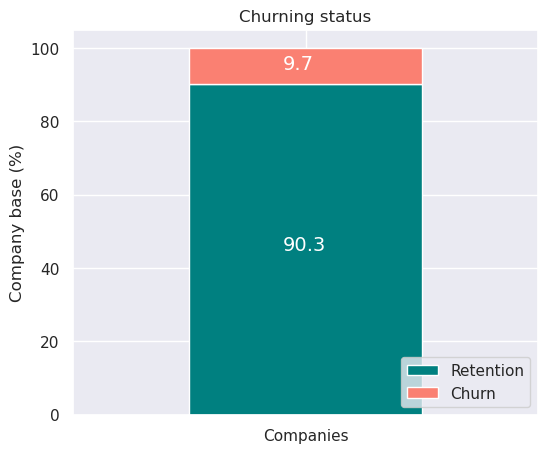

In [10]:
churn = client_df[['id', 'churn']]
#churn.head()
churn.columns = ['Companies', 'churn']
#churn.head()
churn_total = churn.groupby(churn['churn']).count()
#churn_total.head()
churn_percentage = churn_total / churn_total.sum() * 100
#churn_percentage.head()
custom_colors = ['teal', 'salmon']
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (6, 5), legend_="lower right" )

# Histogram

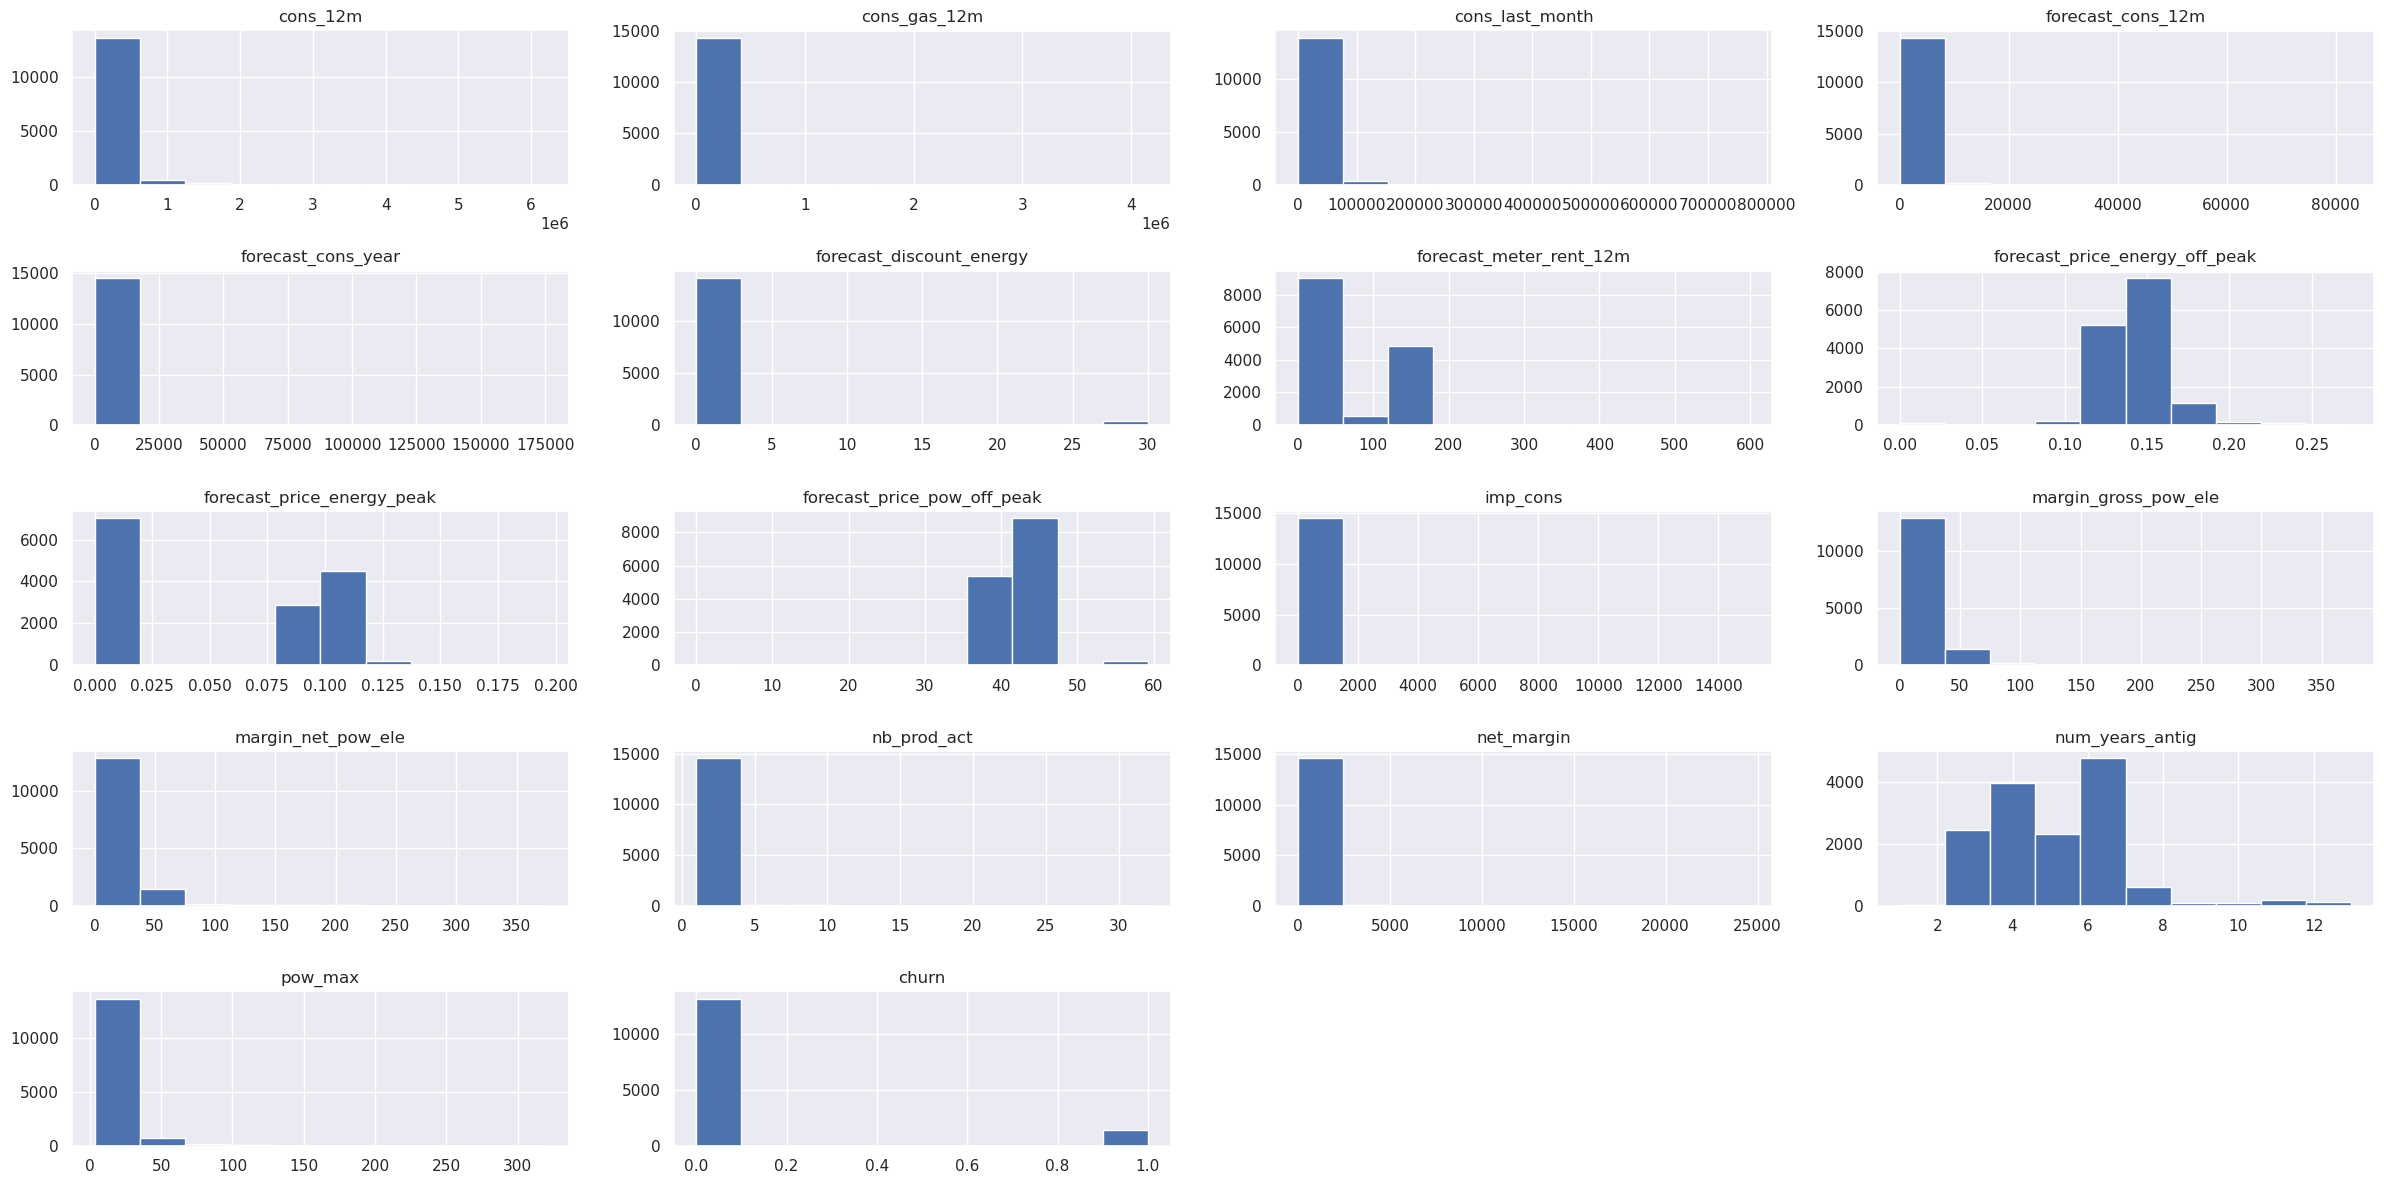

In [11]:
plt.rcParams["figure.figsize"] = [24,12]
plt.rcParams["figure.autolayout"] = True
client_df.hist()
plt.tight_layout()
plt.show()

In [12]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

# Checking Churn status with respect to consumption

(0.0, 1000000.0)

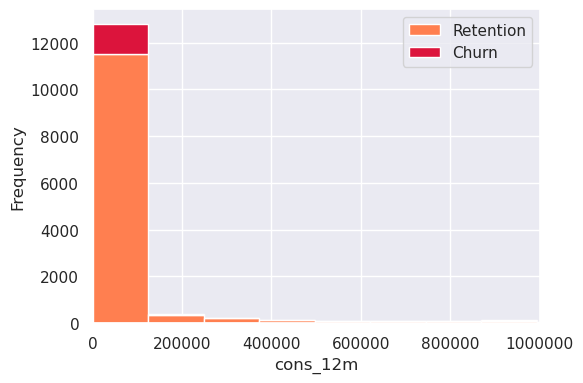

In [13]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(6, 4))

plot_distribution(consumption, 'cons_12m', axs)
axs.set_xlim(0, 1000000) 

# Merging client and price data

In [14]:
merged_df = pd.merge(price_df, client_df, on = "id", how = "inner")
merged_df["price_sensitivity"] = merged_df["price_off_peak_var"] / merged_df["cons_12m"]

In [15]:
merged_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_sensitivity'],
      dtype='object')

In [16]:
merged_df["id"] = merged_df["id"].astype("category")
merged_df["has_gas"] = merged_df["has_gas"].astype("category")
merged_df["origin_up"] = merged_df["origin_up"].astype("category")
merged_df["channel_sales"] = merged_df["channel_sales"].astype("category")

In [17]:
merged_df["price_date"] = pd.to_datetime(merged_df["price_date"])
merged_df["date_activ"] = pd.to_datetime(merged_df["date_activ"])
merged_df["date_end"] = pd.to_datetime(merged_df["date_end"])
merged_df["date_modif_prod"] = pd.to_datetime(merged_df["date_modif_prod"])
merged_df["date_renewal"] = pd.to_datetime(merged_df["date_renewal"])

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  category      
 1   price_date                      175149 non-null  datetime64[ns]
 2   price_off_peak_var              175149 non-null  float64       
 3   price_peak_var                  175149 non-null  float64       
 4   price_mid_peak_var              175149 non-null  float64       
 5   price_off_peak_fix              175149 non-null  float64       
 6   price_peak_fix                  175149 non-null  float64       
 7   price_mid_peak_fix              175149 non-null  float64       
 8   channel_sales                   175149 non-null  category      
 9   cons_12m                        175149 non-null  int64         
 10  cons_gas_12m                    175149 non-null  int64  

In [19]:
unique_values = client_df['channel_sales'].unique()
print(unique_values)
merged_df.describe(include="category")

['foosdfpfkusacimwkcsosbicdxkicaua' 'MISSING'
 'lmkebamcaaclubfxadlmueccxoimlema' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa']


id                     channel_sales  \
count                             175149                            175149   
unique                             14606                                 8   
top     0002203ffbb812588b632b9e628cc38d  foosdfpfkusacimwkcsosbicdxkicaua   
freq                                  12                             80971   

       has_gas                         origin_up  
count   175149                            175149  
unique       2                                 6  
top          f  lxidpiddsbxsbosboudacockeimpuepw  
freq    143364                             85086

# Churn status by channel sales

In [20]:
channel = client_df[["id", "channel_sales", "churn"]]
channel = channel.groupby([channel['channel_sales'], channel['churn'] ])['id'].count().unstack(level = 1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis = 0) * 100).sort_values(by= [1] , ascending = False)

In [21]:
plot_stacked_bars(channel_churn, "Sales Channel", rot_= 45)

# Plot distribution for consumption last month, last 12 month, has gas or not and current paid consumption

In [22]:
fig, axs = plt.subplots(nrows=4, figsize=(20,25))

plot_distribution(consumption, "cons_12m", axs[0], colors = custom_color)
plot_distribution(consumption[consumption['has_gas'] == 't'], "cons_gas_12m", axs[1], colors = custom_color)
plot_distribution(consumption, "cons_last_month", axs[2], colors = custom_color)
plot_distribution(consumption, "imp_cons", axs[3])

# BoxPlot

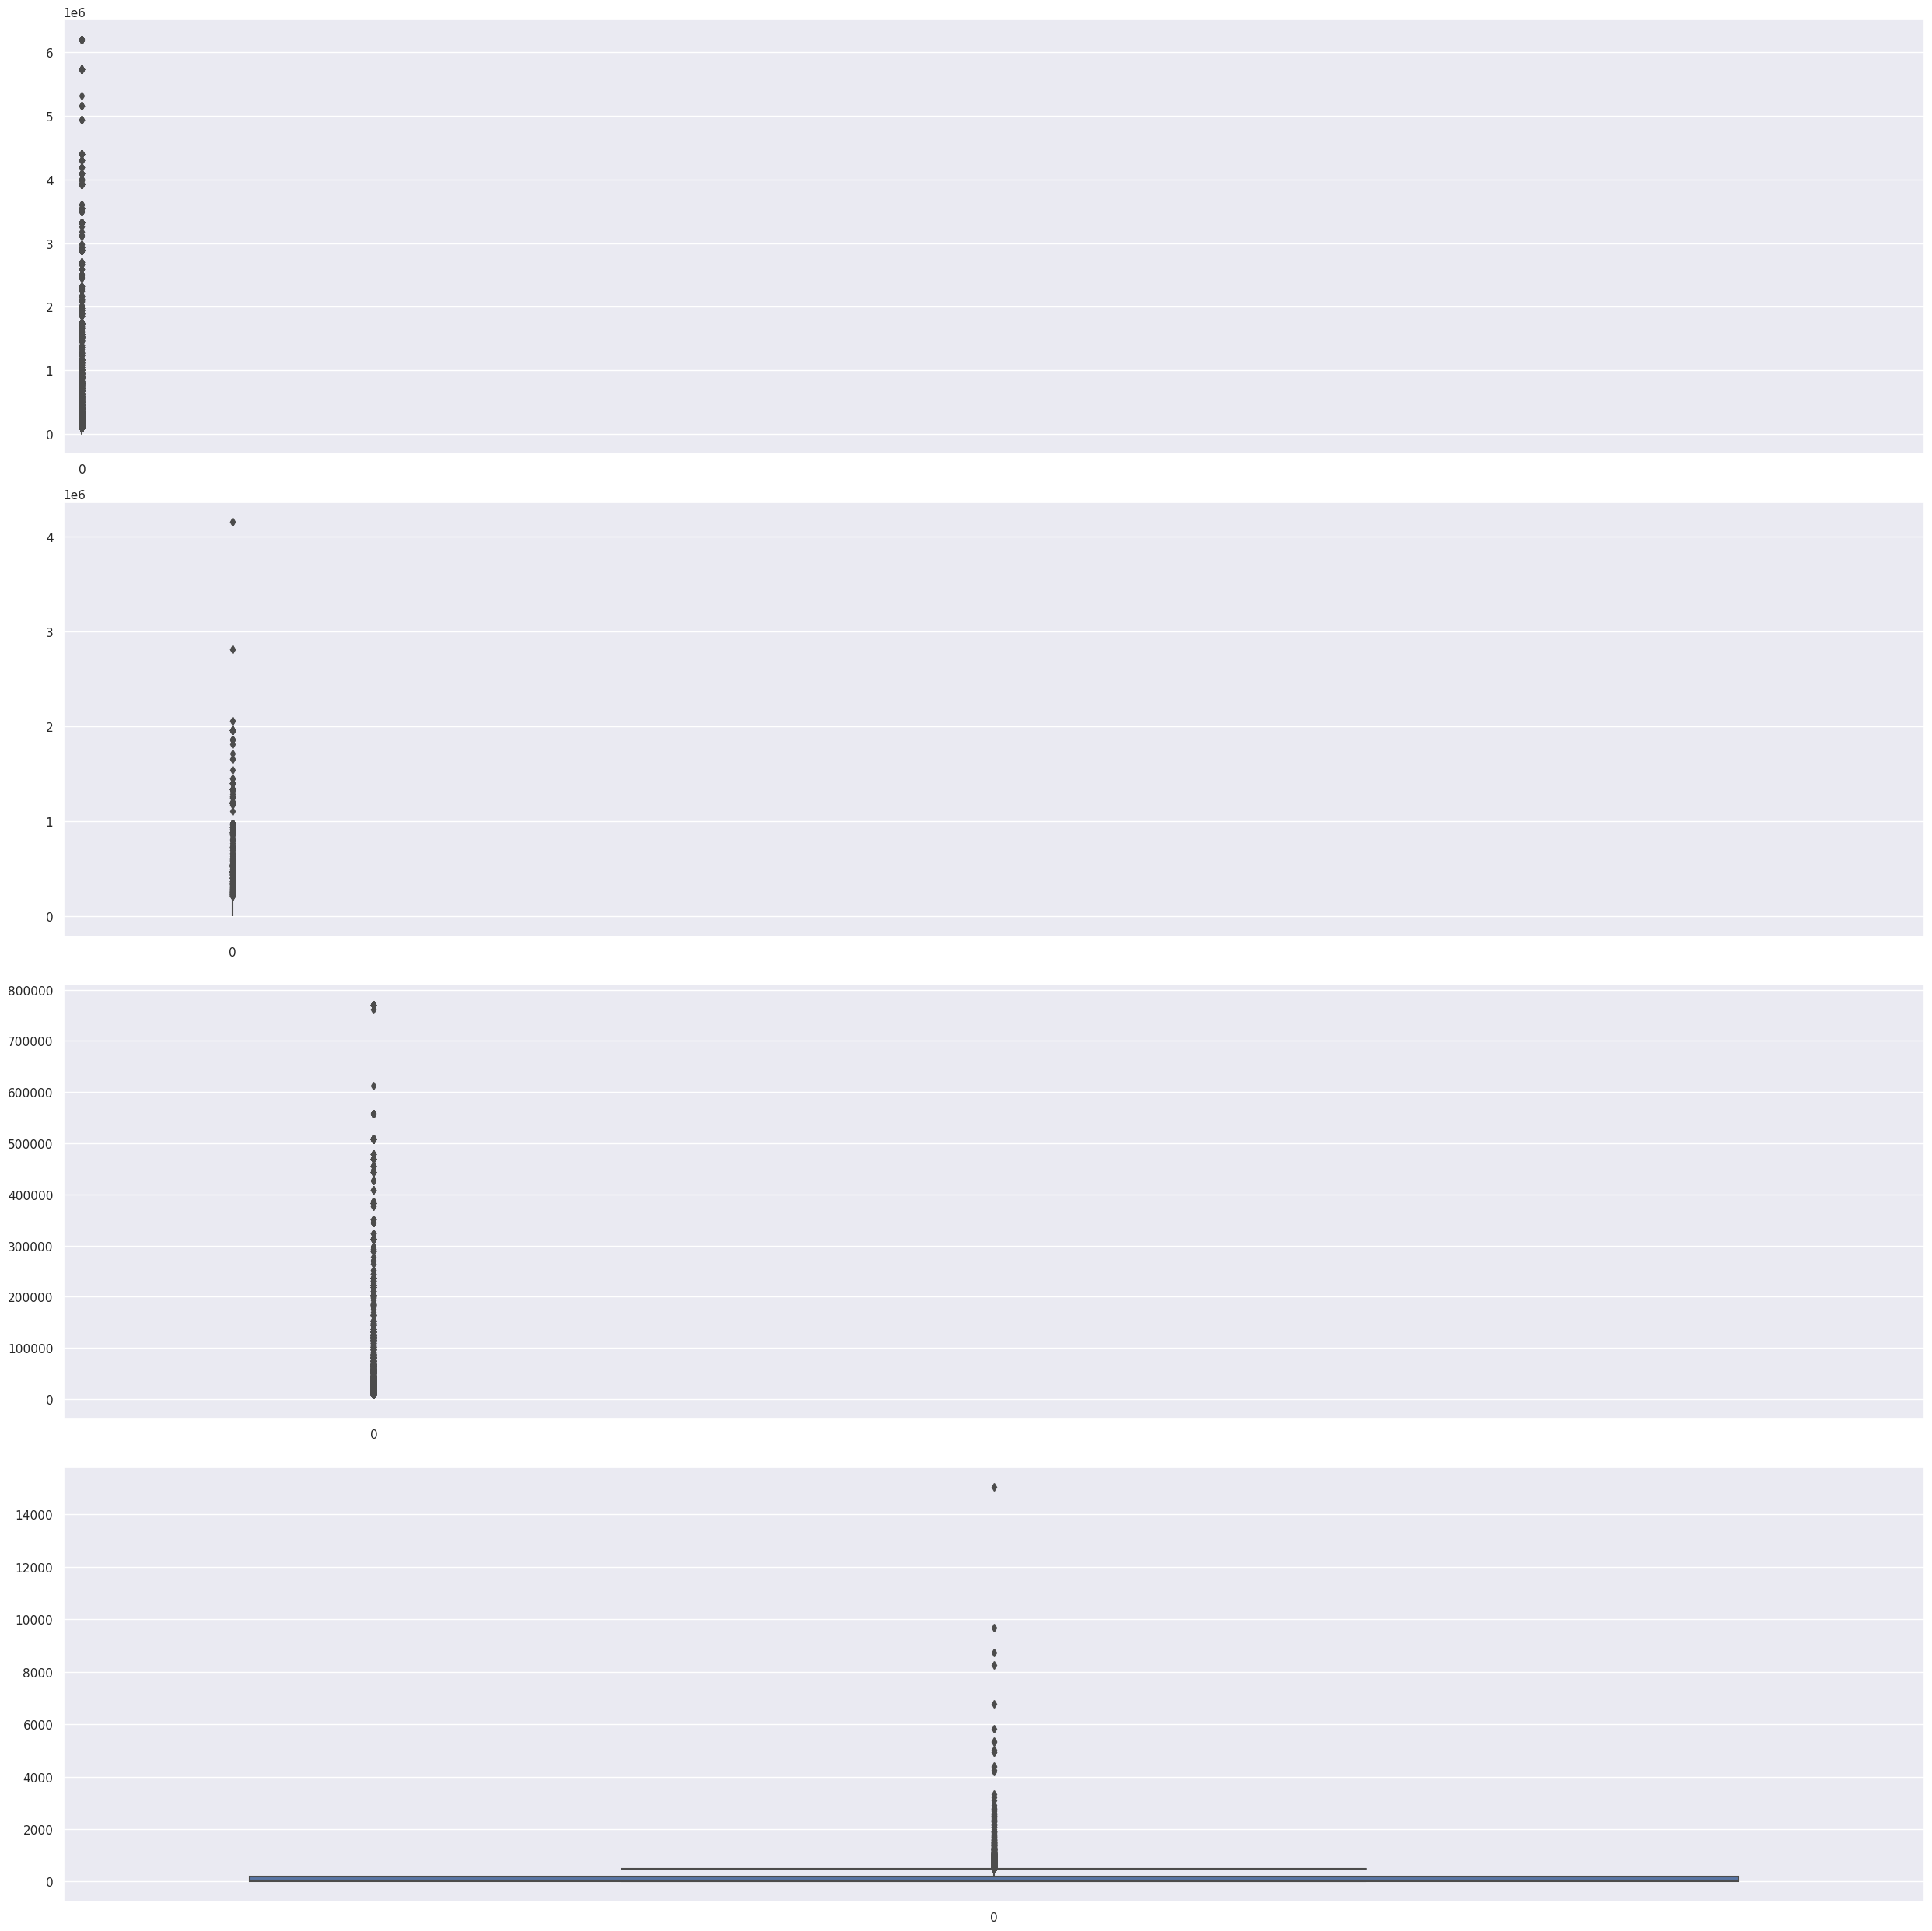

In [23]:
fig, axs = plt.subplots(nrows=4, figsize=(25,25))

sns.boxplot(consumption["cons_12m"], ax = axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax = axs[1])
sns.boxplot(consumption["cons_last_month"], ax = axs[2])
sns.boxplot(consumption["imp_cons"], ax = axs[3])

for ax in axs:
    #ax.ticklabel_format(style="plain", axis="x")

    axs[0].set_xlim(-20_000, 2_000_000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)

plt.show()

# Forecast dataframe

In [24]:
forecast = client_df[
["id", "forecast_cons_12m",
"forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
"forecast_price_energy_off_peak","forecast_price_energy_peak",
"forecast_price_pow_off_peak","churn"
]
]

In [25]:
forecast.columns

Index(['id', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'churn'],
      dtype='object')

In [26]:
fig, axs = plt.subplots(nrows = 7, figsize=(30,50))

# plot
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

# Churn status by gas user

In [27]:
client_type = client_df[["id", "has_gas", "churn"]]
client = client_type.groupby([client_type["churn"], client_type["has_gas"]])["id"].count().unstack(level = 0)
client_pct = (client.div(client.sum(axis =1), axis = 0) * 100).sort_values(by=[1])
plot_stacked_bars(client_pct, "Client Type (Have gas or not)", (8,5))

# Churn status by subscribed power

In [28]:
power = client_df[["id", "pow_max", "churn"]]
fig, ax = plt.subplots(nrows=1, figsize = (6,4))
plot_distribution(power, 'pow_max', ax)
ax.set_xlim(0, 70) 

(0.0, 70.0)

# Churn status by antiquity of the client

In [29]:
antig_years = client_df[["id", "num_years_antig", "churn"]]
antig = antig_years.groupby([antig_years["num_years_antig"], antig_years["churn"]])["id"].count().unstack(level=1)
antig_pct = (antig.div(antig.sum(axis=1), axis=0) * 100)
plot_stacked_bars(antig_pct, "Number of Years")

In [30]:
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"],format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"],format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"],format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date'],format='%Y-%m-%d')

In [31]:
#variance of mean prices over time for each company for year
var_year = price_df.groupby(["id", "price_date"]).mean().groupby(['id']).var().reset_index()

In [32]:
#variance of mean prices over time for each company for 6 months
var_6m = price_df[price_df["price_date"] > "2015-06-01"].groupby(["id", "price_date"]).mean().groupby(["id"]).var().reset_index()

In [33]:
var_year.columns

Index(['id', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

In [34]:
var_year = var_year.rename(columns = {
"price_off_peak_var": "var_year_price_p1_var",
"price_peak_var": "var_year_price_p2_var",
"price_mid_peak_var": "var_year_price_p3_var",
"price_off_peak_fix": "var_year_price_p1_fix",
"price_peak_fix": "var_year_price_p2_fix",
"price_mid_peak_fix": "var_year_price_p3_fix"
})
#var_year.head()
# Calculate the total variance of prices for each company (id) by summing up the variances of energy and power prices
var_year["var_year_price_p1"] = var_year["var_year_price_p1_var"] + var_year["var_year_price_p1_fix"]
var_year["var_year_price_p2"] = var_year["var_year_price_p2_var"] + var_year["var_year_price_p2_fix"]
var_year["var_year_price_p3"] = var_year["var_year_price_p3_var"] + var_year["var_year_price_p3_fix"]
#var_year.head()

In [35]:
var_6m = var_6m.rename(columns = {
"price_off_peak_var": "var_6m_price_p1_var",
"price_peak_var": "var_6m_price_p2_var",
"price_mid_peak_var": "var_6m_price_p3_var",
"price_off_peak_fix": "var_6m_price_p1_fix",
"price_peak_fix": "var_6m_price_p2_fix",
"price_mid_peak_fix": "var_6m_price_p3_fix"
} )

var_6m["var_6m_price_p1"] = var_6m["var_6m_price_p1_var"] + var_6m["var_6m_price_p1_fix"]
var_6m["var_6m_price_p2"] = var_6m["var_6m_price_p2_var"] + var_6m["var_6m_price_p2_fix"]
var_6m["var_6m_price_p3"] = var_6m["var_6m_price_p3_var"] + var_6m["var_6m_price_p3_fix"]
var_6m.head()

id  var_6m_price_p1_var  var_6m_price_p2_var  \
0  0002203ffbb812588b632b9e628cc38d             0.000011             0.000003   
1  0004351ebdd665e6ee664792efc4fd13             0.000003             0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c             0.000003             0.000000   
3  0010ee3855fdea87602a5b7aba8e42de             0.000011             0.000003   
4  00114d74e963e47177db89bc70108537             0.000003             0.000000   

   var_6m_price_p3_var  var_6m_price_p1_fix  var_6m_price_p2_fix  \
0         4.860000e-10                  0.0                  0.0   
1         0.000000e+00                  0.0                  0.0   
2         0.000000e+00                  0.0                  0.0   
3         4.860000e-10                  0.0                  0.0   
4         0.000000e+00                  0.0                  0.0   

   var_6m_price_p3_fix  var_6m_price_p1  var_6m_price_p2  var_6m_price_p3  
0                  0.0         0.000011         0.000003     4.860000e-10  
1                  0.0         0.000003         0.000000     0.000000e+00  
2                  0.0         0.000003         0.000000     0.000000e+00  
3                  0.0         0.000011         0.000003     4.860000e-10  
4                  0.0         0.000003         0.000000     0.000000e+00

In [36]:
# merging var_year and var_6m 
price_features = pd.merge(var_year, var_6m, on = 'id')

In [37]:
price_features.head()

id  var_year_price_p1_var  \
0  0002203ffbb812588b632b9e628cc38d               0.000016   
1  0004351ebdd665e6ee664792efc4fd13               0.000005   
2  0010bcc39e42b3c2131ed2ce55246e3c               0.000676   
3  0010ee3855fdea87602a5b7aba8e42de               0.000025   
4  00114d74e963e47177db89bc70108537               0.000005   

   var_year_price_p2_var  var_year_price_p3_var  var_year_price_p1_fix  \
0               0.000004           1.871602e-06           4.021438e-03   
1               0.000000           0.000000e+00           7.661891e-03   
2               0.000000           0.000000e+00           5.965909e-01   
3               0.000007           1.627620e-07           7.238536e-03   
4               0.000000           0.000000e+00           3.490909e-13   

   var_year_price_p2_fix  var_year_price_p3_fix  var_year_price_p1  \
0               0.001448               0.000643           0.004037   
1               0.000000               0.000000           0.007667   
2               0.000000               0.000000           0.597267   
3               0.002606               0.001158           0.007264   
4               0.000000               0.000000           0.000005   

   var_year_price_p2  var_year_price_p3  var_6m_price_p1_var  \
0           0.001452           0.000645             0.000011   
1           0.000000           0.000000             0.000003   
2           0.000000           0.000000             0.000003   
3           0.002613           0.001158             0.000011   
4           0.000000           0.000000             0.000003   

   var_6m_price_p2_var  var_6m_price_p3_var  var_6m_price_p1_fix  \
0             0.000003         4.860000e-10                  0.0   
1             0.000000         0.000000e+00                  0.0   
2             0.000000         0.000000e+00                  0.0   
3             0.000003         4.860000e-10                  0.0   
4             0.000000         0.000000e+00                  0.0   

   var_6m_price_p2_fix  var_6m_price_p3_fix  var_6m_price_p1  var_6m_price_p2  \
0                  0.0                  0.0         0.000011         0.000003   
1                  0.0                  0.0         0.000003         0.000000   
2                  0.0                  0.0         0.000003         0.000000   
3                  0.0                  0.0         0.000011         0.000003   
4                  0.0                  0.0         0.000003         0.000000   

   var_6m_price_p3  
0     4.860000e-10  
1     0.000000e+00  
2     0.000000e+00  
3     4.860000e-10  
4     0.000000e+00

In [38]:
# merging price features with client df churn 
price_analysis = pd.merge(price_features, client_df[["id", "churn"]], on = "id")
price_analysis.head()

id  var_year_price_p1_var  \
0  0002203ffbb812588b632b9e628cc38d               0.000016   
1  0004351ebdd665e6ee664792efc4fd13               0.000005   
2  0010bcc39e42b3c2131ed2ce55246e3c               0.000676   
3  00114d74e963e47177db89bc70108537               0.000005   
4  0013f326a839a2f6ad87a1859952d227               0.000016   

   var_year_price_p2_var  var_year_price_p3_var  var_year_price_p1_fix  \
0               0.000004               0.000002           4.021438e-03   
1               0.000000               0.000000           7.661891e-03   
2               0.000000               0.000000           5.965909e-01   
3               0.000000               0.000000           3.490909e-13   
4               0.000004               0.000002           0.000000e+00   

   var_year_price_p2_fix  var_year_price_p3_fix  var_year_price_p1  \
0               0.001448               0.000643           0.004037   
1               0.000000               0.000000           0.007667   
2               0.000000               0.000000           0.597267   
3               0.000000               0.000000           0.000005   
4               0.000000               0.000000           0.000016   

   var_year_price_p2  var_year_price_p3  var_6m_price_p1_var  \
0           0.001452           0.000645             0.000011   
1           0.000000           0.000000             0.000003   
2           0.000000           0.000000             0.000003   
3           0.000000           0.000000             0.000003   
4           0.000004           0.000002             0.000011   

   var_6m_price_p2_var  var_6m_price_p3_var  var_6m_price_p1_fix  \
0             0.000003         4.860000e-10                  0.0   
1             0.000000         0.000000e+00                  0.0   
2             0.000000         0.000000e+00                  0.0   
3             0.000000         0.000000e+00                  0.0   
4             0.000003         4.860000e-10                  0.0   

   var_6m_price_p2_fix  var_6m_price_p3_fix  var_6m_price_p1  var_6m_price_p2  \
0                  0.0                  0.0         0.000011         0.000003   
1                  0.0                  0.0         0.000003         0.000000   
2                  0.0                  0.0         0.000003         0.000000   
3                  0.0                  0.0         0.000003         0.000000   
4                  0.0                  0.0         0.000011         0.000003   

   var_6m_price_p3  churn  
0     4.860000e-10      0  
1     0.000000e+00      0  
2     0.000000e+00      0  
3     0.000000e+00      0  
4     4.860000e-10      0

/tmp/ipykernel_20/3645593545.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = price_analysis.corr()


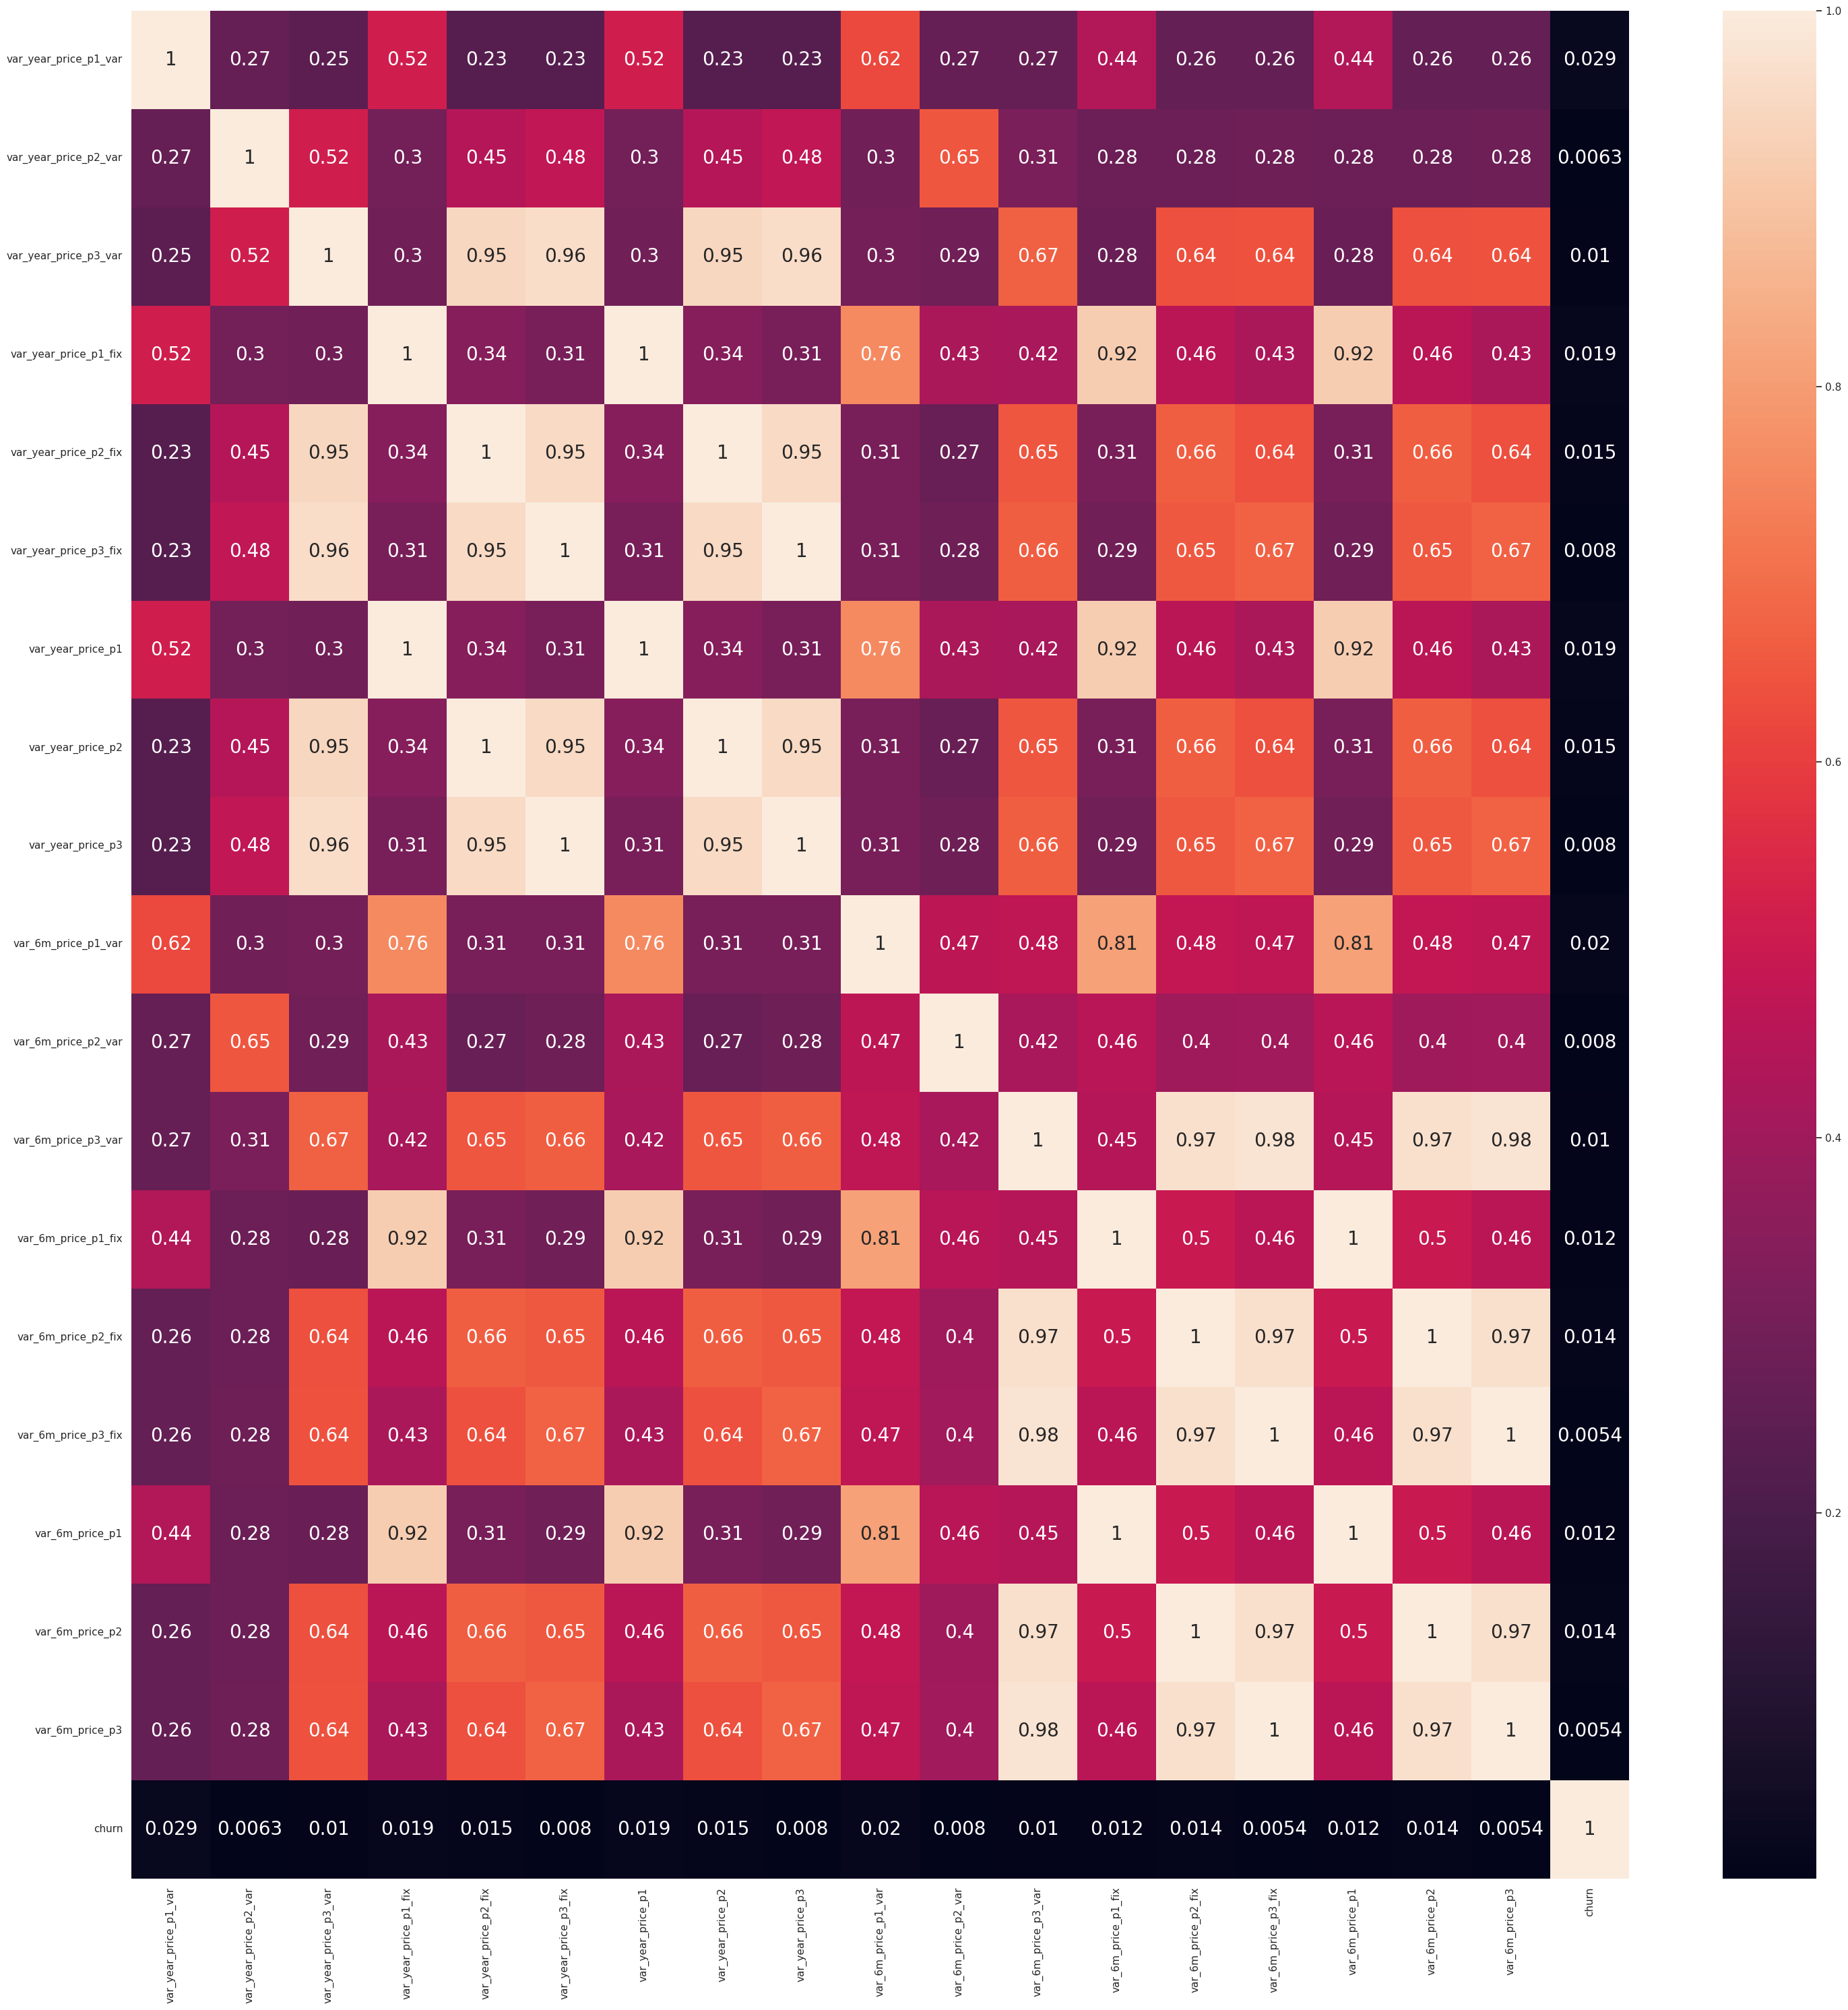

In [39]:
# correlation in columns
corr = price_analysis.corr()

plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True, annot_kws={'size':20})
plt.show()

In [40]:
merged_data = pd.merge(client_df.drop(columns=["churn"]), price_analysis, on ="id" )
merged_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  var_6m_price_p1_var  \
0      2015-11-01   2015-06-23               0.00  ...             0.000131   
1      2009-08-21   2015-08-31             189.95  ...             0.000003   
2      2010-04-16   2015-04-17              47.96  ...             0.000004   
3      2010-03-30   2015-03-31             240.04  ...             0.000003   
4      2010-01-13   2015-03-09             445.75  ...             0.000011   

   var_6m_price_p2_var  var_6m_price_p3_var  var_6m_price_p1_fix  \
0         4.100838e-05         9.084737e-04             2.086294   
1         1.217891e-03         0.000000e+00             0.009482   
2         9.450150e-08         0.000000e+00             0.000000   
3         0.000000e+00         0.000000e+00             0.000000   
4         2.896760e-06         4.860000e-10             0.000000   

   var_6m_price_p2_fix  var_6m_price_p3_fix var_6m_price_p1  var_6m_price_p2  \
0            99.530517            44.235794        2.086425     9.953056e+01   
1             0.000000             0.000000        0.009485     1.217891e-03   
2             0.000000             0.000000        0.000004     9.450150e-08   
3             0.000000             0.000000        0.000003     0.000000e+00   
4             0.000000             0.000000        0.000011     2.896760e-06   

   var_6m_price_p3  churn  
0     4.423670e+01      1  
1     0.000000e+00      0  
2     0.000000e+00      0  
3     0.000000e+00      0  
4     4.860000e-10      0  

[5 rows x 44 columns]

In [41]:
# clean dataset for further analysis
merged_data.to_csv("clean_data.csv")

In [42]:
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
import numpy as np
import datetime as dt

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [43]:
df = pd.read_csv("/kaggle/working/clean_data.csv",parse_dates = True, index_col = "Unnamed: 0")
df["date_activ"] = pd.to_datetime(df["date_activ"], format = "%Y-%m-%d")
df["date_end"] = pd.to_datetime(df["date_end"], format = "%Y-%m-%d")
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format = "%Y-%m-%d")
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format = "%Y-%m-%d")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [45]:
df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  ...  var_6m_price_p1_var  \
count                 14606.000000  ...         14606.000000   
mean                     43.130056  ...             0.000025   
std                       4.485988  ...             0.000204   
min                       0.000000  ...             0.000000   
25%                      40.606701  ...             0.000003   
50%                      44.311378  ...             0.000004   
75%                      44.311378  ...             0.000011   
max                      59.266378  ...             0.005543   

       var_6m_price_p2_var  var_6m_price_p3_var  var_6m_price_p1_fix  \
count         1.460600e+04         1.460600e+04         14606.000000   
mean          3.304264e-05         1.406015e-05             0.922810   
std           2.231791e-04         1.273170e-04            18.218286   
min           0.000000e+00         0.000000e+00             0.000000   
25%           0.000000e+00         0.000000e+00             0.000000   
50%           9.450150e-08         0.000000e+00             0.000000   
75%           2.896760e-06         4.860000e-10             0.007962   
max           4.791197e-03         2.415288e-03           525.988881   

       var_6m_price_p2_fix  var_6m_price_p3_fix  var_6m_price_p1  \
count         14606.000000         14606.000000     14606.000000   
mean              1.460247             0.634413         0.922835   
std              13.760009             5.895346        18.218452   
min               0.000000             0.000000         0.000000   
25%               0.000000             0.000000         0.000004   
50%               0.000000             0.000000         0.000011   
75%               0.000000             0.000000         0.007973   
max             399.471115            80.876029       525.994268   

       var_6m_price_p2  var_6m_price_p3         churn  
count     1.460600e+04     1.460600e+04  14606.000000  
mean      1.460280e+00     6.344275e-01      0.097152  
std

In [46]:
df.describe(include = object)

id                     channel_sales  \
count                              14606                             14606   
unique                             14606                                 8   
top     24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
freq                                   1                              6754   

       has_gas                         origin_up  
count    14606                             14606  
unique       2                                 6  
top          f  lxidpiddsbxsbosboudacockeimpuepw  
freq     11955                              7097

In [47]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format = "%y-%m-%d")
price_df.tail()

id price_date  price_off_peak_var  \
192997  16f51cdc2baa19af0b940ee1b3dd17d5 2015-08-01            0.119916   
192998  16f51cdc2baa19af0b940ee1b3dd17d5 2015-09-01            0.119916   
192999  16f51cdc2baa19af0b940ee1b3dd17d5 2015-10-01            0.119916   
193000  16f51cdc2baa19af0b940ee1b3dd17d5 2015-11-01            0.119916   
193001  16f51cdc2baa19af0b940ee1b3dd17d5 2015-12-01            0.119916   

        price_peak_var  price_mid_peak_var  price_off_peak_fix  \
192997        0.102232            0.076257           40.728885   
192998        0.102232            0.076257           40.728885   
192999        0.102232            0.076257           40.728885   
193000        0.102232            0.076257           40.728885   
193001        0.102232            0.076257           40.728885   

        price_peak_fix  price_mid_peak_fix  
192997        24.43733           16.291555  
192998        24.43733           16.291555  
192999        24.43733           16.291555  
193000        24.43733           16.291555  
193001        24.43733           16.291555

In [48]:
#Grouping off-peak prices by month and companies 
# Calculate the monthly average prices for variable(energy) and fixed(power) components for each company (id)
# by grouping the data by 'id' and 'price_date', and aggregating the mean of 'price_off_peak_var' and 'price_off_peak_fix'
monthly_prices_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var' : 'mean', 'price_off_peak_fix' : 'mean'}).reset_index()
monthly_prices_by_id

id price_date  price_off_peak_var  \
0       0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1       0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2       0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3       0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4       0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   
...                                  ...        ...                 ...   
192997  ffff7fa066f1fb305ae285bb03bf325a 2015-08-01            0.119916   
192998  ffff7fa066f1fb305ae285bb03bf325a 2015-09-01            0.119916   
192999  ffff7fa066f1fb305ae285bb03bf325a 2015-10-01            0.119916   
193000  ffff7fa066f1fb305ae285bb03bf325a 2015-11-01            0.119916   
193001  ffff7fa066f1fb305ae285bb03bf325a 2015-12-01            0.119916   

        price_off_peak_fix  
0                40.565969  
1                40.565969  
2                40.728885  
3                40.728885  
4                40.728885  
...                    ...  
192997           40.728885  
192998           40.728885  
192999           40.728885  
193000           40.728885  
193001           40.728885  

[193002 rows x 4 columns]

In [49]:
#Get Jan and Dec prices
jan_prices = monthly_prices_by_id.groupby("id").first().reset_index()
dec_prices = monthly_prices_by_id.groupby("id").last().reset_index()
jan_prices #contain the data for the earliest available price date for each company

id price_date  price_off_peak_var  \
0      0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1      0004351ebdd665e6ee664792efc4fd13 2015-01-01            0.148047   
2      0010bcc39e42b3c2131ed2ce55246e3c 2015-01-01            0.150837   
3      0010ee3855fdea87602a5b7aba8e42de 2015-01-01            0.123086   
4      00114d74e963e47177db89bc70108537 2015-01-01            0.149434   
...                                 ...        ...                 ...   
16091  ffef185810e44254c3a4c6395e6b4d8a 2015-01-01            0.162720   
16092  fffac626da707b1b5ab11e8431a4d0a2 2015-01-01            0.148825   
16093  fffc0cacd305dd51f316424bbb08d1bd 2015-01-01            0.153159   
16094  fffe4f5646aa39c7f97f95ae2679ce64 2015-01-01            0.127566   
16095  ffff7fa066f1fb305ae285bb03bf325a 2015-01-01            0.129444   

       price_off_peak_fix  
0               40.565969  
1               44.266931  
2               44.444710  
3               40.565969  
4               44.266931  
...                   ...  
16091           41.063970  
16092           44.266931  
16093           41.063970  
16094           40.565969  
16095           40.565969  

[16096 rows x 4 columns]

In [50]:
# Calculate the difference between December and January prices and create a DataFrame 'diff'

# Merge the 'dec_prices' DataFrame with the 'jan_prices' DataFrame based on the 'id' column
# Rename the columns to provide clarity about the columns being merged
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}),
               jan_prices.drop(columns='price_date'),
               on='id')

# Calculate the difference between the December and January prices for both energy and power components
diff["offpeak_diff_dec_jan_energy"] = diff["dec_1"] - diff["price_off_peak_var"]
diff["offpeak_diff_dec_jan_power"] = diff["dec_2"] - diff["price_off_peak_fix"]

# Create a new DataFrame 'diff' containing columns: 'id', 'offpeak_diff_dec_jan_energy', 'offpeak_diff_dec_jan_power'
diff = diff[['id', 'offpeak_diff_dec_jan_energy', 'offpeak_diff_dec_jan_power']]
diff.head()

id  offpeak_diff_dec_jan_energy  \
0  0002203ffbb812588b632b9e628cc38d                    -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                    -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                     0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                    -0.010018   
4  00114d74e963e47177db89bc70108537                    -0.003994   

   offpeak_diff_dec_jan_power  
0                    0.162916  
1                    0.177779  
2                    1.500000  
3                    0.162916  
4                   -0.000001

In [51]:
# merging df and diff
df = pd.merge(df, diff, on = 'id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  var_6m_price_p3_var  \
0      2015-11-01   2015-06-23               0.00  ...         9.084737e-04   
1      2009-08-21   2015-08-31             189.95  ...         0.000000e+00   
2      2010-04-16   2015-04-17              47.96  ...         0.000000e+00   
3      2010-03-30   2015-03-31             240.04  ...         0.000000e+00   
4      2010-01-13   2015-03-09             445.75  ...         4.860000e-10   

   var_6m_price_p1_fix  var_6m_price_p2_fix  var_6m_price_p3_fix  \
0             2.086294            99.530517            44.235794   
1             0.009482             0.000000             0.000000   
2             0.000000             0.000000             0.000000   
3             0.000000             0.000000             0.000000   
4             0.000000             0.000000             0.000000   

   var_6m_price_p1  var_6m_price_p2 var_6m_price_p3  churn  \
0         2.086425     9.953056e+01    4.423670e+01      1   
1         0.009485     1.217891e-03    0.000000e+00      0   
2         0.000004     9.450150e-08    0.000000e+00      0   
3         0.000003     0.000000e+00    0.000000e+00      0   
4         0.000011     2.896760e-06    4.860000e-10      0   

   offpeak_diff_dec_jan_energy  offpeak_diff_dec_jan_power  
0                     0.020057                    3.700961  
1                    -0.003767                    0.177779  
2                    -0.004670                    0.177779  
3                    -0.004547                    0.177779  
4                    -0.006192                    0.162916  

[5 rows x 46 columns]

In [52]:
df.to_csv("Current.csv")

In [53]:
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  var_6m_price_p3_var  \
0      2015-11-01   2015-06-23               0.00  ...         9.084737e-04   
1      2009-08-21   2015-08-31             189.95  ...         0.000000e+00   
2      2010-04-16   2015-04-17              47.96  ...         0.000000e+00   
3      2010-03-30   2015-03-31             240.04  ...         0.000000e+00   
4      2010-01-13   2015-03-09             445.75  ...         4.860000e-10   

   var_6m_price_p1_fix  var_6m_price_p2_fix  var_6m_price_p3_fix  \
0             2.086294            99.530517            44.235794   
1             0.009482             0.000000             0.000000   
2             0.000000             0.000000             0.000000   
3             0.000000             0.000000             0.000000   
4             0.000000             0.000000             0.000000   

   var_6m_price_p1  var_6m_price_p2 var_6m_price_p3  churn  \
0         2.086425     9.953056e+01    4.423670e+01      1   
1         0.009485     1.217891e-03    0.000000e+00      0   
2         0.000004     9.450150e-08    0.000000e+00      0   
3         0.000003     0.000000e+00    0.000000e+00      0   
4         0.000011     2.896760e-06    4.860000e-10      0   

   offpeak_diff_dec_jan_energy  offpeak_diff_dec_jan_power  
0                     0.020057                    3.700961  
1                    -0.003767                    0.177779  
2                    -0.004670                    0.177779  
3                    -0.004547                    0.177779  
4                    -0.006192                    0.162916  

[5 rows x 46 columns]

In [54]:
### Average Price change across periods
#Calculating average price changes across individual periods, instead of the entire year.
mean_prices = price_df.groupby(['id']).agg({
'price_off_peak_var': 'mean',
'price_peak_var': 'mean',
'price_mid_peak_var': 'mean',
'price_off_peak_fix': 'mean',
'price_peak_fix': 'mean',
'price_mid_peak_fix': 'mean'
})

In [55]:
# Calculate the mean differences between consecutive periods 
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices["price_off_peak_var"] - mean_prices["price_peak_var"]
mean_prices["peak_mid_peak_var_mean_diff"] = mean_prices["price_peak_var"] - mean_prices["price_mid_peak_var"]
mean_prices["off_peak_mid_peak_var_mean_diff"] = mean_prices["price_off_peak_var"] - mean_prices["price_mid_peak_var"]
mean_prices["off_peak_peak_fix_mean_diff"] = mean_prices["price_off_peak_fix"] - mean_prices["price_peak_fix"]
mean_prices["peak_mid_peak_fix_mean_diff"] = mean_prices["price_peak_fix"] - mean_prices["price_mid_peak_fix"]
mean_prices["off_peak_mid_peak_fix_mean_diff"] = mean_prices["price_off_peak_fix"] - mean_prices["price_mid_peak_fix"]

In [56]:
mean_prices.reset_index(inplace=True)

In [57]:
columns = [
'id',
'off_peak_peak_var_mean_diff',
'peak_mid_peak_var_mean_diff',
'off_peak_mid_peak_var_mean_diff',
'off_peak_peak_fix_mean_diff',
'peak_mid_peak_fix_mean_diff',
'off_peak_mid_peak_fix_mean_diff'
]

#merging df and price_df
df = pd.merge(df, mean_prices[columns], on = 'id')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               14606 non-null  object        
 1   channel_sales                    14606 non-null  object        
 2   cons_12m                         14606 non-null  int64         
 3   cons_gas_12m                     14606 non-null  int64         
 4   cons_last_month                  14606 non-null  int64         
 5   date_activ                       14606 non-null  datetime64[ns]
 6   date_end                         14606 non-null  datetime64[ns]
 7   date_modif_prod                  14606 non-null  datetime64[ns]
 8   date_renewal                     14606 non-null  datetime64[ns]
 9   forecast_cons_12m                14606 non-null  float64       
 10  forecast_cons_year               14606 non-null  int64    

Monitoring and analyzing price fluctuations across various time intervals is crucial because it requires adopting a customer-centric perspective. Customers are generally not pleased with abrupt price increases between months or unexpected spikes in prices over short periods. Such sudden changes in pricing may motivate customers to explore alternative utility providers in search of better and more stable deals. These factors are likely to be significant considerations when predicting customer churn.

# Client Retention

In [58]:
# finding tenure of customers in years
df['tenure'] = ((df['date_end'] - df['date_activ'] ) / np.timedelta64(1, 'Y') ).astype(int)

In [59]:
tenure = df.groupby(['tenure']).agg({'churn' : 'mean' }).sort_values(by = 'churn', ascending = False)
tenure['churn'] = tenure['churn'] * 100
tenure.head()

churn
tenure           
3       14.371257
2       13.307985
4       12.575638
13       9.523810
5        8.542550

There is a higher churn rate for companies that have been a client for less than 4 years or less months are most likely to churn. At 5 years there is a 4 % drop in churn indicating that past 4 years are likely important to keeping a customer. 
- `months_activ` is the Number of months active until reference date
- `months_to_end` is the Number of months of the contract left untill reference date
- `months_modif_prod` Number of months since last modification until reference date
- `motnhs_renewal` Number of months since last renewal until ref date.

In [60]:
def convert_to_months(reference, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months


In [61]:
# Create reference date
reference_date = dt.datetime(2016, 1, 1)

# Columns
df['months_activ'] = convert_to_months(reference_date, df, 'date_activ')
df['months_to_end'] = convert_to_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_to_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_to_months(reference_date, df, 'date_renewal')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   peak_mid_peak_var_mean_diff  off_peak_mid_peak_var_mean_diff  \
0                     0.034219                         0.058257   
1                     0.007124                         0.149609   
2                     0.088421                         0.170512   
3                     0.000000                         0.151210   
4                     0.030773                         0.051309   

   off_peak_peak_fix_mean_diff  peak_mid_peak_fix_mean_diff  \
0                    18.590255                     7.450670   
1                    44.311375                     0.000000   
2                    44.385450                     0.000000   
3                    44.400265                     0.000000   
4                    16.275263                     8.137629   

   off_peak_mid_peak_fix_mean_diff  tenure months_activ  months_to_end  \
0                        26.040925       3           30             -5   
1                        44.311375       7           76             -7   
2                        44.385450       6           68             -3   
3                        44.400265       6           69             -2   
4                        24.412893       6           71             -2   

   months_modif_prod  months_renewal  
0                  2               6  
1                 76               4  
2                 68               8  
3                 69               9  
4                 71               9  

[5 rows x 57 columns]

In [62]:
# Removing the datetime 
remove = [
'date_activ',
'date_end',
'date_modif_prod',
'date_renewal'
]
df = df.drop(columns=remove)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_mean_diff  \
0                        0.114481  ...                     0.034219   
1                        0.145711  ...                     0.007124   
2                        0.165794  ...                     0.088421   
3                        0.146694  ...                     0.000000   
4                        0.116900  ...                     0.030773   

   off_peak_mid_peak_var_mean_diff off_peak_peak_fix_mean_diff  \
0                         0.058257                   18.590255   
1                         0.149609                   44.311375   
2                         0.170512                   44.385450   
3                         0.151210                   44.400265   
4                         0.051309                   16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  tenure  \
0                     7.450670                        26.040925       3   
1                     0.000000                        44.311375       7   
2                     0.000000                        44.385450       6   
3                     0.000000                        44.400265       6   
4                     8.137629                        24.412893       6   

   months_activ  months_to_end  months_modif_prod months_renewal  
0            30             -5                  2              6  
1            76             -7                 76              4  
2            68             -3                 68              8  
3            69             -2                 69              9  
4            71             -2                 71              9  

[5 rows x 53 columns]

In [63]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1,0])
df.groupby(['has_gas']).agg({'churn' : 'mean'})

churn
has_gas          
0        0.100544
1        0.081856

**Clients who do not buy gas are 2% more likely to churn**

### Transforming Categorical data

- The models cannot accept categories or `strings` values, so they need to encod categorical features with numerical representations. 
- Can use label encoding to map an integer however it introduces the concept of order into a feature which may not be true for the data. 
- Can also use dummy variables, `One-hot-encoding`, to create new features for each unique value and filling the column with 1 or 0 to indicate if it's true or not.

In [64]:
df['channel_sales'] = df['channel_sales'].astype('category')
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [65]:
df = pd.get_dummies(df, columns = ['channel_sales'], prefix = 'channel' )
df = df.drop(columns = ["channel_sddiedcslfslkckwlfkdpoeeailfpeds", "channel_epumfxlbckeskwekxbiuasklxalciiuu",
                       "channel_fixdbufsefwooaasfcxdxadsiekoceaa"])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  tenure  months_activ  months_to_end  \
0                    0.098142  ...       3            30             -5   
1                    0.000000  ...       7            76             -7   
2                    0.087899  ...       6            68             -3   
3                    0.000000  ...       6            69             -2   
4                    0.100015  ...       6            71             -2   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  2               6                0   
1                 76               4                1   
2                 68               8                0   
3                 69               9                0   
4                 71               9                1   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 57 columns]

In [66]:
# Categorizing 'origin_up'
df['origin_up'] = df['origin_up'].astype('category')

# Categories Count
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [67]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 
                      'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                  2               6   
1                    0.000000  ...                 76               4   
2                    0.087899  ...                 68               8   
3                    0.000000  ...                 69               9   
4                    0.100015  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 59 columns]

### Transforming numerical data

- Need to treat skewness is because some predictive models have inherent assumptions about the distributions of the features, such models are called `parametric models`, these models assume that all features are both independent and normally distributed. 
- Although *skewness* isn't always a bad thing it's a good rule of thumb to treat highly skewed variables b/c of model assumptions and it can improve the speed at which the model converges. 

- Possible transformations that can applied to a continous numeric column: `Square root`, `Cubic root`, `Logarithm`, the dsitribution will change here the `Logarithm` transformation is applied for positively skewed data. 



In [68]:
skewed = [
'cons_12m',
'cons_gas_12m',
'cons_last_month',
'forecast_cons_12m',
'forecast_cons_year',
'forecast_discount_energy',
'forecast_meter_rent_12m',
'forecast_price_energy_off_peak',
'forecast_price_energy_peak',
'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

In [69]:
# Applying Log10 transformations , Adding 1 because log(0) cannot be applied 
df['cons_12m'] = np.log10(df['cons_12m'] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [70]:
df.describe()#log 10 transformed value with +1 added in them

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       4.223939      0.779244         2.264646           2.962177   
std        0.884515      1.717071         1.769305           0.683592   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.754023      0.000000         0.000000           2.695477   
50%        4.149727      0.000000         2.899547           3.046836   
75%        4.610285      0.000000         3.529430           3.380716   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean             1.784610                  0.966726                 1.517203   
std              1.584986                  5.108289                 0.571481   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296555   
75%              3.242231                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal  \
count                 14606.000000  ...       14606.000000    14606.000000   
mean                     43.130056  ...          35.464056        4.910516   
std                       4.485988  ...          30.248229        3.795906   
min                       0.000000  ...           0.000000        0.000000   
25%                      40.606701  ...           6.000000        2.000000   
50%                      44.311378  ...          30.000000        5.000000   
75%                      44.311378  ...          64.000000        8.000000   
max                      59.266378  ...         151.000000       30.000000   

       channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
count     14606.000000                              14606.000000   
mean          0.255032                                  0.061139   
std           0.435894                                  0.239594   
min           0.000000                                  0.000000   
25%           0.000000                                  0.000000   
50%           0.000000                                  0.000000   
75%           1.000000                                  0.000000   
max           1.000000                                  1.000000   

       channel_foosdfpfkusacimwkcsosbicdxkicaua  \
count                              14606.000000   
mean                                   0.462413   
std                                    0.498602   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    1.000000   
max                                    1.000000   

       channel_lmkebamcaaclubfxadlmueccxoimlema  \
count                              14606.000000   
mean                                   0.126181   
std                                    0.332065   
min                           

Standard deviation of the features is much lower after the log10-transformation. It makes the feature more stable and predictable 

In [71]:
df.to_csv("Current.csv")

Checking the distribution of some of the features 

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


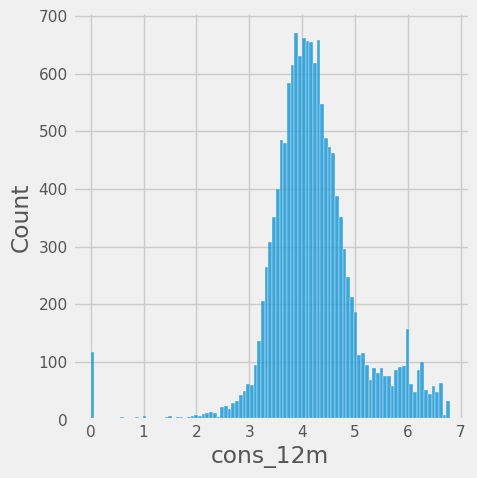

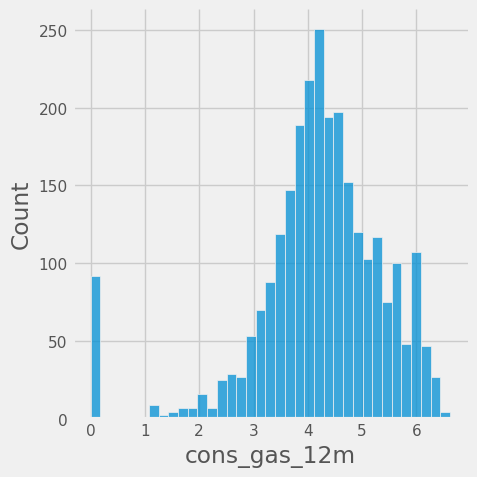

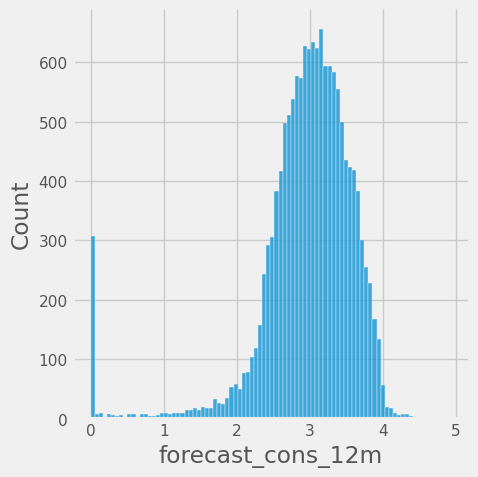

In [72]:
# plot histograms 
sns.displot((df['cons_12m'].dropna()), ax=axs[0] )
sns.displot((df[df['has_gas']==1 ]['cons_gas_12m'].dropna() ))
sns.displot((df['cons_last_month'].dropna()) )
sns.displot((df['forecast_cons_12m'].dropna()) )

# Correlations

In [73]:
correlation = df.corr()

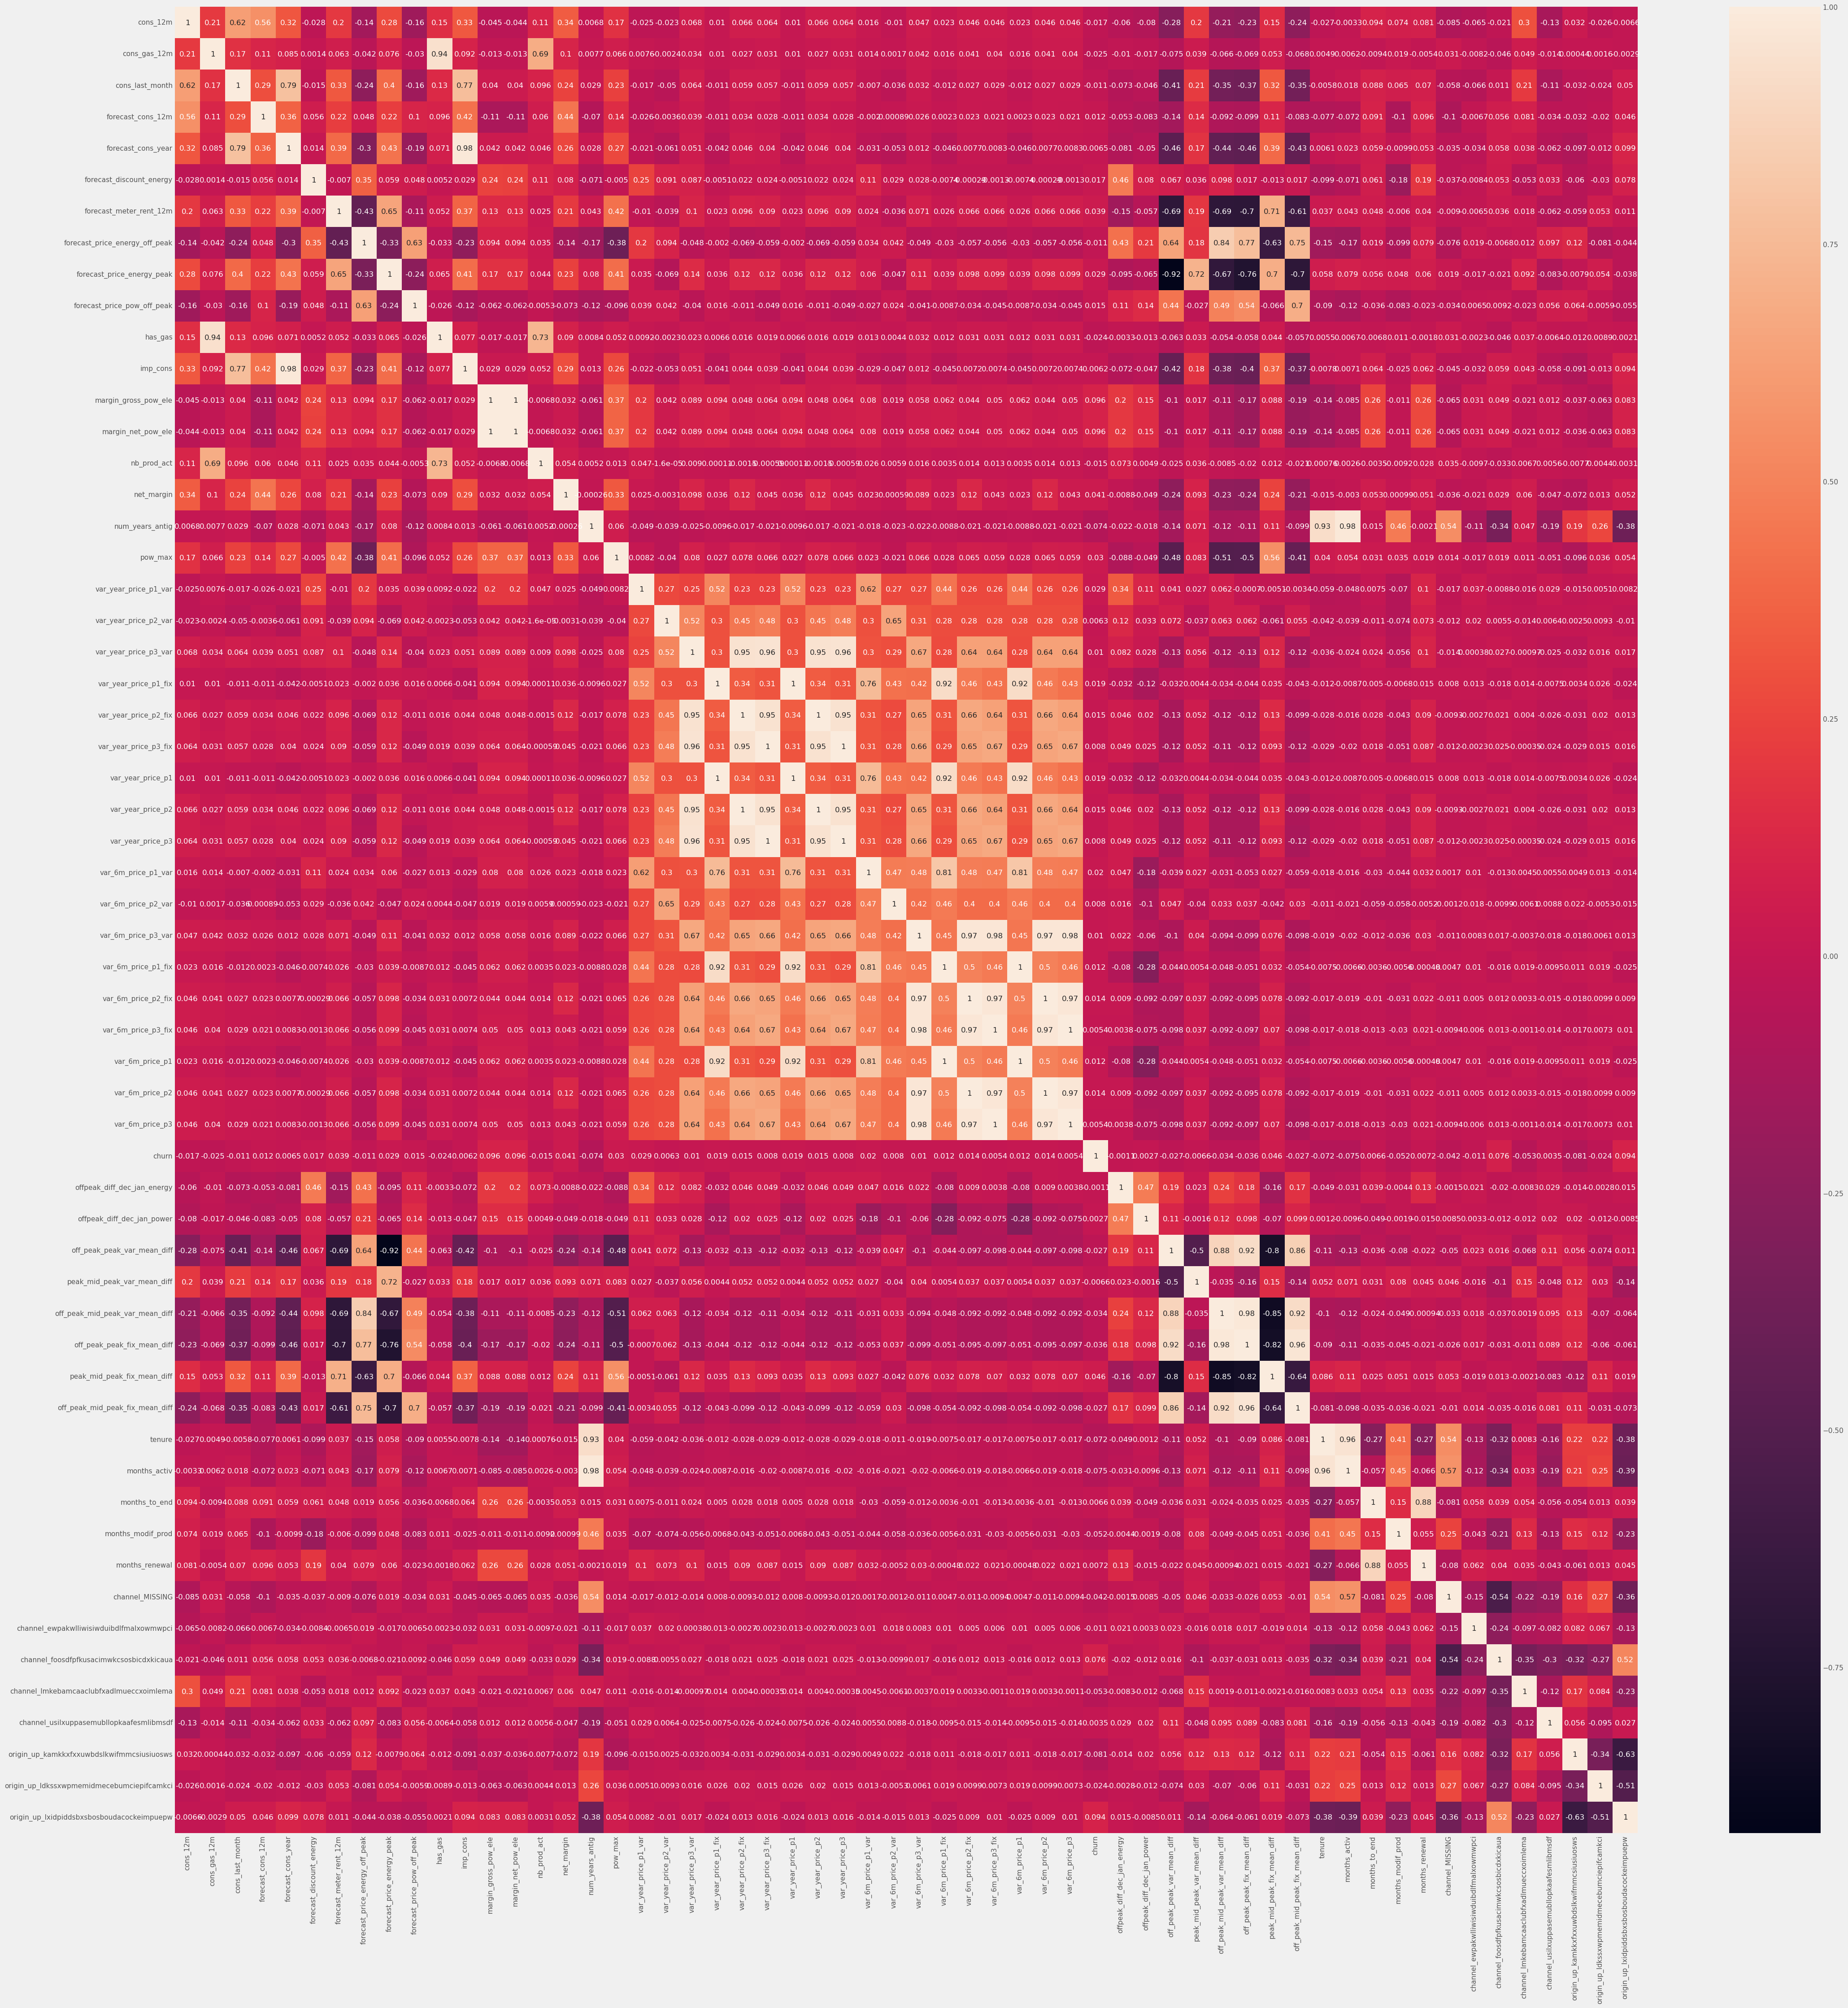

In [74]:
plt.figure(figsize=(45,45))
sns.heatmap(
    correlation, 
    annot = True,
    annot_kws={'size' : 12}
)
plt.show()

In [75]:
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0           0.000000            0.000000                       0.0   
1           2.280920            0.000000                       0.0   
2           1.689841            0.000000                       0.0   
3           2.382089            0.000000                       0.0   
4           2.650065            2.721811                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 0.444045                        0.114481   
1                 1.237292                        0.145711   
2                 1.599009                        0.165794   
3                 1.318689                        0.146694   
4                 2.122969                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                  2               6   
1                    0.000000  ...                 76               4   
2                    0.087899  ...                 68               8   
3                    0.000000  ...                 69               9   
4                    0.100015  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 59 columns]

# Conclusion
In this EDA:
- Explored and visualized Various features that leads customer to churn
- This EDA provide Cleaned data set for various modelling
- The major fact that affecting the customer to churn is, there is a higher churn rate for companies that have been a client for less than 4 years or less months are most likely to churn. At 5 years there is a 4 % drop in churn indicating that past 4 years are likely important to keeping a customer.